# Lab 3.03 - Confidence intervals


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 3.1 - rlanders

Load the dataset data/rlanders.csv. Use the column Money.  
We assume that the values from this sample are normally distributed around a population mean $\mu$ that is unknown, but that the standard deviation of the population is known, i.e. $\sigma = 98$.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
# Show the first few records of the Data Frame
df.head()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4


Calculate a 99% confidence interval ` ( betrouwbaarheidsinterval )` for the population mean (Answer: [484.191, 516.121]).

```
📌 Welke formule gebruik je?
Omdat:
- De populatiestandaardafwijking 𝜎 bekend is

- En de data is normaal verdeeld (van de zin 'We assume that the values from this sample are normally distributed ')

- Gebruik je de Z-formule voor het betrouwbaarheidsinterval:
```


![WW](Photo's/Screenshot%202025-04-15%20132500.png)
![WW](Photo's/Screenshot%202025-04-15%20132549.png)
![WW](Photo's/Screenshot%202025-04-15%20132622.png)
![WW](Photo's/Screenshot%202025-04-15%20133325.png)

99% betrouwbaarheidsinterval: [484.191, 516.121]


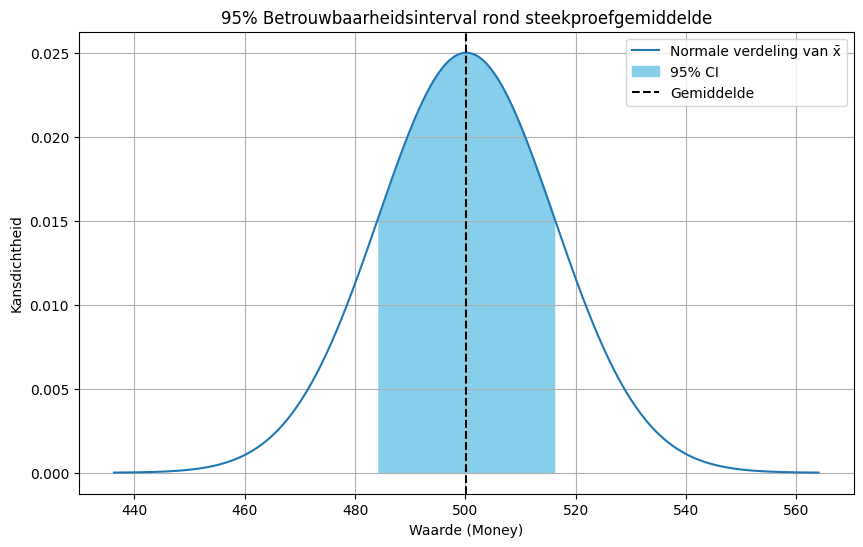

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 1. Laad de data

# 2. Gebruik de kolom 'Money'
money = df["Money"]

# 3. Bepaal steekproefgrootte en gemiddelde
n = len(money)
x_bar = np.mean(money)
sigma = 98  # bekende populatiestandaardafwijking

# 4. Z-score voor 99% betrouwbaarheidsniveau
z_star = norm.ppf(0.995)  # 99% CI → 0.5% aan beide zijden → 0.995

# 5. Bereken standaardfout
SE  = z_star * (sigma / np.sqrt(n))

# 6. Bereken het interval
lower = x_bar - SE 
upper = x_bar + SE 

print(f"99% betrouwbaarheidsinterval: [{lower:.3f}, {upper:.3f}]")

x = np.linspace(x_bar - 4*SE, x_bar + 4*SE, 1000)
y = norm.pdf(x, x_bar, SE)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normale verdeling van x̄')
plt.fill_between(x, y, where=(x >= lower) & (x <= upper), color='skyblue', label='95% CI')
plt.axvline(x_bar, color='black', linestyle='--', label='Gemiddelde')
plt.title('95% Betrouwbaarheidsinterval rond steekproefgemiddelde')
plt.xlabel('Waarde (Money)')
plt.ylabel('Kansdichtheid')
plt.legend()
plt.grid()
plt.show()


Calculate a 95% confidence interval for the population mean. (Answer =  [488.008, 512.304])

95% betrouwbaarheidsinterval: [488.008, 512.304]


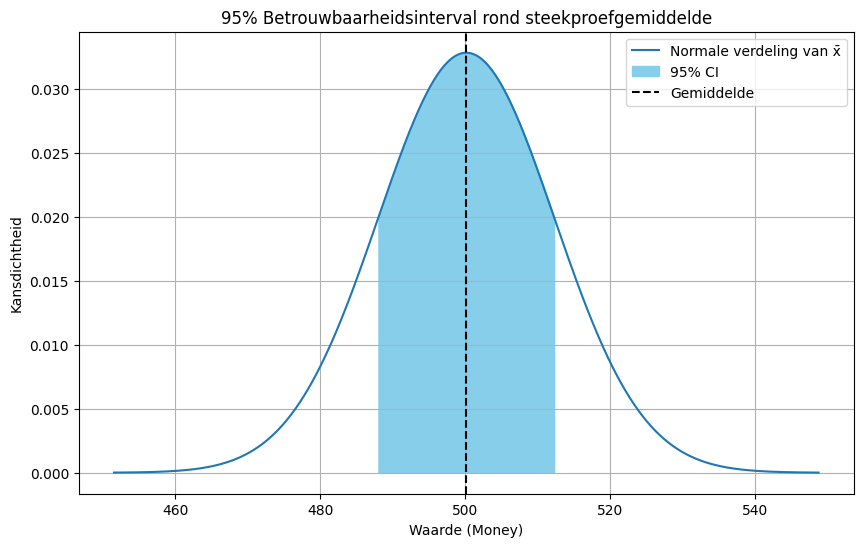

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 1. Laad de data

# 2. Gebruik de kolom 'Money'
money = df["Money"]

# 3. Bepaal steekproefgrootte en gemiddelde
n = len(money)
x_bar = np.mean(money)
sigma = 98  # bekende populatiestandaardafwijking

# 4. Z-score voor 95% betrouwbaarheidsniveau
z_star = norm.ppf(0.975)  # 95% CI → 2.5% aan elke kant → 0.975 cumulatief

# 5. Bereken standaardfout
SE  = z_star * (sigma / np.sqrt(n))

# 6. Bereken het interval
lower = x_bar - SE 
upper = x_bar + SE 

 
print(f"95% betrouwbaarheidsinterval: [{lower:.3f}, {upper:.3f}]")


# 6. Plot normale verdeling en CI
x = np.linspace(x_bar - 4*SE, x_bar + 4*SE, 1000)
y = norm.pdf(x, x_bar, SE)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normale verdeling van x̄')
plt.fill_between(x, y, where=(x >= lower) & (x <= upper), color='skyblue', label='95% CI')
plt.axvline(x_bar, color='black', linestyle='--', label='Gemiddelde')
plt.title('95% Betrouwbaarheidsinterval rond steekproefgemiddelde')
plt.xlabel('Waarde (Money)')
plt.ylabel('Kansdichtheid')
plt.legend()
plt.grid()

Suppose σ is unknown, calculate a 95% confidence interval for the population mean. (Answer = [487.319, 512.993])

![WA](Photo's/Screenshot%202025-04-15%20134352.png)
![WA](Photo's/Screenshot%202025-04-15%20134452.png)
![WA](Photo's/Screenshot%202025-04-15%20134606.png)

95% betrouwbaarheidsinterval (σ onbekend): [487.319, 512.993]


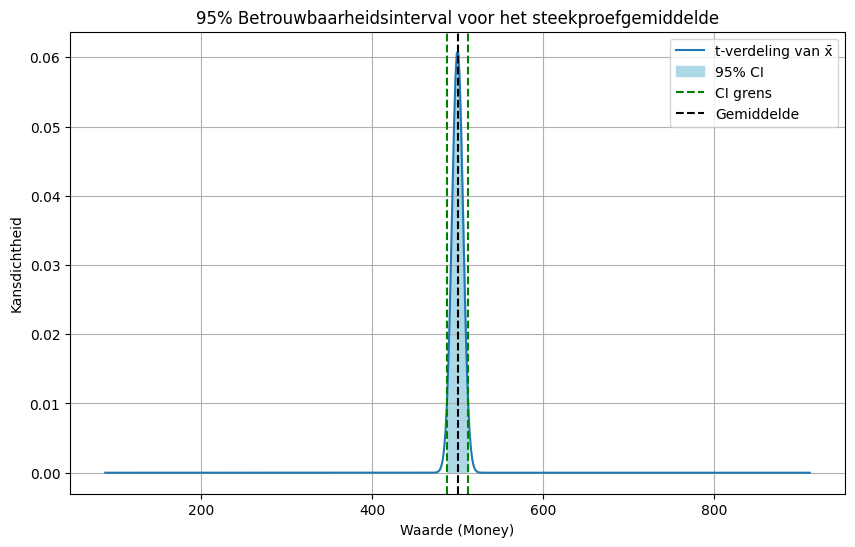

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import t

# 1. Laad data
money = df["Money"]

# 2. Bereken steekproefgegevens
n = len(money)
x_bar = np.mean(money)
s = money.std()
SE = s / np.sqrt(n)

# 3. t-waarde voor 95% CI bij df = n - 1
t_star = t.ppf(0.975, df=n - 1)

# 4. Betrouwbaarheidsinterval
lower = x_bar - t_star * SE
upper = x_bar + t_star * SE

print(f"95% betrouwbaarheidsinterval (σ onbekend): [{lower:.3f}, {upper:.3f}]")


# 5. Visualisatie
dist_x = np.linspace(x_bar - 4 * s, x_bar + 4 * s, num=500)
dist_y = stats.t.pdf(dist_x, df=n - 1, loc=x_bar, scale=SE)

plt.figure(figsize=(10, 6))
plt.plot(dist_x, dist_y, label="t-verdeling van x̄")
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= lower) & (dist_x <= upper), color='lightblue', label='95% CI')
plt.axvline(lower, color="green", linestyle='--', label="CI grens")
plt.axvline(upper, color="green", linestyle='--')
plt.axvline(x_bar, color="black", linestyle='--', label="Gemiddelde")

plt.title("95% Betrouwbaarheidsinterval voor het steekproefgemiddelde")
plt.xlabel("Waarde (Money)")
plt.ylabel("Kansdichtheid")
plt.legend()
plt.grid()
plt.show()

Finally, suppose the sample consists of only the first 25 observations in this dataset. Calculate a 95% confidence interval for this situation.  
(Answer = [450.291,536.669])

t-score: 2.06390
Confidence interval: [450.2912, 536.6688]


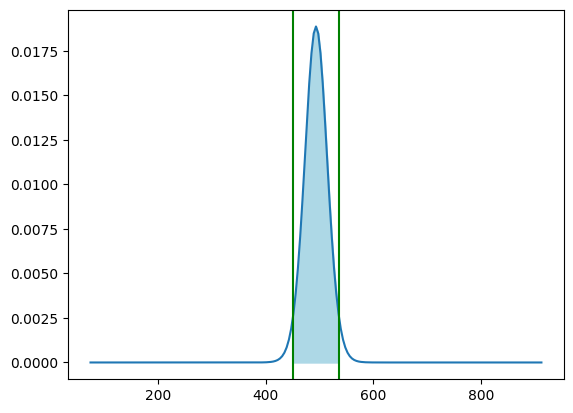

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Sample data
sample = df["Money"].head(25)
m = sample.mean()       # Sample mean
s = sample.std()  # Sample standard deviation (unbiased)
n = 25  # Sample size
alpha = 0.05  # 95% confidence level

# Step 2: Gebruik T-score in plaats van Z-score
t = stats.t.isf(alpha/2, df=n-1)  # alpha/2  is correct: 2.5% links en 2.5% rechts  EN  T-score met df=n-1
print("t-score: %.5f" % t)

# Step 3: Bereken het betrouwbaarheidsinterval
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

# Visualisatie
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
dist_y = stats.t.pdf(dist_x, df=n-1, loc=m, scale=s/np.sqrt(n))
plt.plot(dist_x, dist_y)

# Kleur tussen de grenzen
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= lo) & (dist_x <= hi), color='lightblue')
plt.axvline(lo, color="green")
plt.axvline(hi, color="green")

plt.show()


## Exercise 3.2

1. How do you calculate the upper and lower limits of a 95% and 99% confidence interval?
2. A 99% confidence interval is [wider/narrower/the same width] as a 95% confidence interval. Why?
3. What would a 100% confidence interval look like?